# coordinate descsent visualization
 100 inlier samples and 25 outlier samples

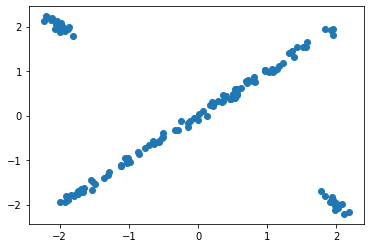

In [1]:
# generate training data
import numpy as np
import matplotlib.pyplot as plt
N = 100
x = np.random.uniform(-1,1,N)
x = np.sort(x)
y = x + .03*np.random.randn(N)
Nadd = 20
x_add = -1 + .05*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[[x.T], [x_add.T]]
y = np.c_[[y.T], [y_add.T]]
Nadd = 20
x_add = 1 + .05*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[x, [x_add]]
y = np.c_[y, [y_add]]

x=x*2
y=y*2

import matplotlib.pyplot as plt
t = np.linspace(-1,1,100)
plt.plot(x.T,y.T,'o')
plt.show()


#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression(normalize=True)
#linreg.fit(x.T,y.T)
#plt.plot([-2,2],[linreg.intercept_ - 2*linreg.coef_[0],linreg.intercept_ + 2*linreg.coef_[0]],'-r')
#plt.plot(x.T,y.T,'o')
#plt.show()

#from sklearn.linear_model import HuberRegressor
#huber = HuberRegressor(epsilon=1.0).fit(x.T, y.T)
#plt.plot([-2,2],[huber.intercept_ - 2*huber.coef_[0], huber.intercept_ + 2*huber.coef_[0]],'-r')
#plt.plot(x.T,y.T,'o')
#plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t=0
T=100
w0__=np.zeros(T)
w1__=np.zeros(T)
w0__[0]=1.0
w1__[0]=2.0
A = np.c_[x.T, np.ones(x.T.shape)]
print(np.shape(A))
print(np.shape(w0__))
print(np.shape(y))
np.size(y)

(140, 2)
(100,)
(1, 140)


140

### Gadient descent with L2 loss is not robust against outliers

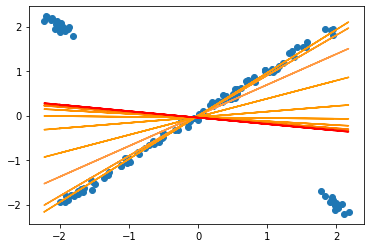

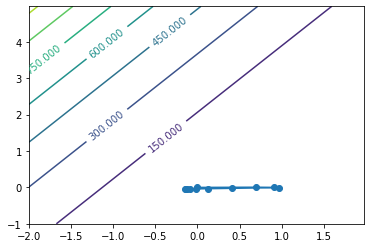

In [20]:

# linear regression step-by-step
from numpy.linalg import inv
H = inv(np.matmul(A.T,A))
res = A.dot(np.append(w1__[t],w0__[t]))-y.T
#grd = 0.5*(np.matmul(H,np.matmul(A.T,res.T)))

grd = 0
for i in np.arange(np.size(y)):
    grd= grd + A[i]*(A[i].dot(np.append(w1__[t],w0__[t])) - y.T[i])

grd = 0.5*(np.matmul(H,grd))

eta=1.
w0__[t+1] = w0__[t] - eta*grd[1]
w1__[t+1] = w1__[t] - eta*grd[0]
t=t+1

import matplotlib.pyplot as plt
plt.plot(x.T,y.T,'o')
for i in range(t):
    plt.plot(x.T, w1__[i+1]*x.T + w0__[i+1], color=(1.,0.6*(1-((1+i)/float(t))**8),0.6*(1-((1+i)/float(t)))**8))
plt.show()

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.025
x_ = np.arange(-2, 2.0, delta)
y_ = np.arange(-1.0, 5.0, delta)
X, Y = np.meshgrid(x_, y_)
Z = np.zeros(X.shape)
for i in range(10):
    Z = Z+(A[i,0]*X + A[i,1]*Y-y.T[i])**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(w1__[0:t+1],w0__[0:t+1],'-o')

## Robust gradient descent

In [21]:
t=0
T=100
w0__=np.zeros(T)
w1__=np.zeros(T)
w0__[0]=0
w1__[0]=0.
A = np.c_[x.T, np.ones(x.T.shape)]

[-0.38039318 -0.37302718]


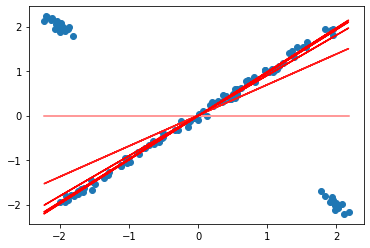

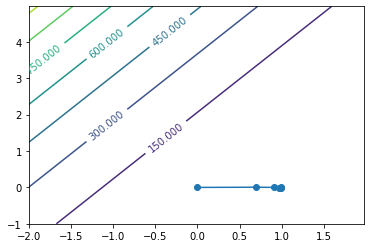

In [26]:
# linear regression step-by-step
from numpy.linalg import inv  
H = inv(np.matmul(A.T,A)) 
H = np.identity(2) 
res = A.dot(np.append(w1__[t],w0__[t]))-y.T 
#grd = 0.5*(np.matmul(H,np.matmul(A.T,res.T))) 

candidate = np.zeros((np.size(y) ,2)) 
mag = np.zeros(np.size(y))
for i in np.arange(np.size(y)):
    candidate[i] = (A[i].dot(np.append(w1__[t],w0__[t])) - y.T[i])
    mag[i] = (A[i].dot(np.append(w1__[t],w0__[t])) - y.T[i])**2
mag_ = np.median(mag)

grd=0
J = int(np.floor(np.size(y)/float(2)))
j = np.zeros(J)
for k in range(J):
    j[k] = np.argmin(np.absolute(mag-mag_))
    mag[int(j[k])] = mag_+np.max(mag)-np.min(mag)
    grd = grd + A[int(j[k])]*candidate[int(j[k])]

print(grd)
eta = 0.01
w0__[t+1] = w0__[t] - eta*grd[1]
w1__[t+1] = w1__[t] - eta*grd[0]
t=t+1

import matplotlib.pyplot as plt
plt.plot(x.T,y.T,'o')
for i in range(t):
    plt.plot(x.T, w1__[i]*x.T + w0__[i], color=(1.,0.6*(1-(i/float(t)))**8,0.6*(1-(i/float(t)))**8))
plt.show()

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.025
x_ = np.arange(-2, 2.0, delta)
y_ = np.arange(-1.0, 5.0, delta)
X, Y = np.meshgrid(x_, y_)
Z = np.zeros(X.shape)
for i in range(10):
    Z = Z+(A[i,0]*X + A[i,1]*Y-y.T[i])**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(w1__[0:t+1],w0__[0:t+1],'-o')

In [237]:
np.shape(A.dot(np.append(w1__[t],w0__[t])))

(140,)

In [316]:
np.shape(mag_)

()

In [317]:
mag_


1.0866089426686125

In [326]:
mag

array([8.76518532e+00, 8.78241549e+00, 8.33254977e+00, 8.28675572e+00,
       8.39896497e+00, 8.13837426e+00, 8.07364694e+00, 8.34137707e+00,
       7.01593111e+00, 7.38694235e+00, 6.56551957e+00, 6.61155420e+00,
       6.25050456e+00, 6.41880815e+00, 6.00556452e+00, 6.38983306e+00,
       5.37774947e+00, 5.37748700e+00, 5.29130200e+00, 4.57304481e+00,
       4.69078919e+00, 4.81800368e+00, 4.23104886e+00, 4.39920941e+00,
       4.25873166e+00, 3.23947916e+00, 3.26141919e+00, 2.75001451e+00,
       2.92593836e+00, 2.98450737e+00, 2.72827837e+00, 2.59971159e+00,
       2.39225821e+00, 2.37112556e+00, 6.21535804e+01, 6.43267445e+01,
       4.69414321e+01, 4.80280141e+01, 5.88938344e+01, 5.23743422e+01,
       5.78072523e+01, 1.21708074e+01, 3.93353580e+01, 2.30366276e+01,
       4.04219400e+01, 1.54305535e+01, 3.60756119e+01, 3.06427018e+01,
       2.62963737e+01, 4.15085220e+01, 3.71621939e+01, 3.82487759e+01,
       5.56340883e+01, 5.34609243e+01, 4.47682681e+01, 6.10669984e+01,
      

In [328]:
np.argmin(np.absolute(mag-mag_))

65

In [330]:
np.absolute(mag-mag_)

array([ 7.67857637,  7.69580654,  7.24594082,  7.20014678,  7.31235603,
        7.05176531,  6.987038  ,  7.25476813,  5.92932217,  6.30033341,
        5.47891062,  5.52494526,  5.16389562,  5.33219921,  4.91895558,
        5.30322412,  4.29114053,  4.29087805,  4.20469306,  3.48643586,
        3.60418025,  3.73139473,  3.14443991,  3.31260046,  3.17212272,
        2.15287022,  2.17481025,  1.66340557,  1.83932942,  1.89789842,
        1.64166943,  1.51310265,  1.30564927,  1.28451661, 61.06697149,
       63.24013554, 45.85482317, 46.94140519, 57.80722542, 51.28773329,
       56.7206434 , 11.08419844, 38.24874901, 21.95001867, 39.33533103,
       14.34394451, 34.98900294, 29.55609283, 25.20976474, 40.42191306,
       36.07558497, 37.16216699, 54.54747935, 52.37431531, 43.68165913,
       59.98038947, 62.15355351, 67.58646363, 68.67304565, 75.19253779,
       73.01937374, 77.36570183, 74.10595577, 84.97177599, 81.71202993,
        0.94544407,  0.96284413,  0.98009388,  1.05223456,  1.06